In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10 as lg
from numpy import pi as pi
from scipy.interpolate import interp1d as sp_interp1d
from scipy.integrate import odeint
from scipy.integrate import ode
import warnings
import timeit
import scipy.optimize as opt
from matplotlib import cm
from astropy import constants as const
from astropy import units as u
G=const.G.cgs.value
c=const.c.cgs.value
Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
km=10**5
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 25
matplotlib.rcParams['ytick.labelsize'] = 25
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.major.size'] = 8
matplotlib.rcParams['ytick.major.size'] = 8
matplotlib.rcParams['xtick.minor.size'] = 4
matplotlib.rcParams['ytick.minor.size'] = 4
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['axes.labelpad'] = 8.0
matplotlib.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='major', labelsize=18)

[ 1.          0.          1.          0.69797623  0.11326595 -0.11326595
  0.69797623]


Text(0.5,0,'$\\rm{Time\\,[s]}$')

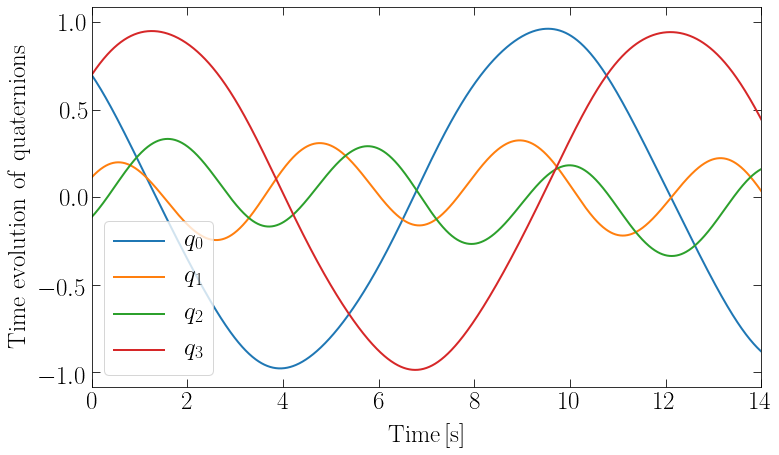

In [2]:
def wqdot(y, t):
    
    I1 = 1
    I2 = 2
    I3 =3
    
    m= (y[3]**2 + y[4]**2 + y[5]**2 + y[6]**2 )**0.5
    y[3], y[4], y[5], y[6] =  y[3]/m, y[4]/m, y[5]/m, y[6]/m
    
    w1, w2, w3, q0, q1, q2, q3 = y[0], y[1], y[2], y[3], y[4], y[5], y[6]
    
    dydt=np.array([ (I2-I3) / I1 * w2 * w3, (I3-I1) / I2 * w3 * w1, (I1-I2) / I3 * w1 * w2, 1/2 * (-w1 * q1 - w2 * q2 - w3 * q3),
          1/2 * (w1 * q0 + w3 * q2 - w2 * q3), 1/2 * (w2 * q0 - w3 * q1 + w1 * q3), 1/2 * (w3 * q0 + w2 * q1 - w1 * q2)])

    return(dydt)

def initial(I1,I2,I3,w01,w02,w03):
    
   
    w1 = w01
    w2 = w02
    w3 = w03
    J=(I1**2*w1**2+I2**2*w2**2+I3**2*w3**2)**0.5
    J3=I3*w3
    theta0=np.arccos(J3/J)
    phi0=0
    psi0=pi/2
    
    q0 = np.cos(theta0 / 2) * np.cos((phi0 + psi0) / 2)
    q1 = np.sin(theta0 / 2) * np.cos((phi0 - psi0) / 2)
    q2 = np.sin(theta0 / 2) * np.sin((phi0 - psi0) / 2)
    q3 = np.cos(theta0 / 2) * np.sin((phi0 + psi0) / 2)
    
    return(np.array([w1, w2, w3, q0, q1, q2, q3]))

y0 =initial(1,2,3,1,0,1)
print(y0)
t = np.linspace(0, 1000, 100001)

sol = odeint(wqdot, y0, t, rtol=10**-15, atol=10**-13)

plt.figure(figsize=(12,7))
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)  

plt.plot(t, sol[:,3], label='$q_{0}$', linewidth=2)

plt.plot(t,sol[:,4], label='$q_{1}$', linewidth=2)

plt.plot(t,sol[:,5], label='$q_{2}$', linewidth=2)

plt.plot(t,sol[:,6], label='$q_{3}$', linewidth=2)

plt.xlim(0,14)

plt.legend(fontsize=25)
plt.ylabel(r'$\rm{Time\,\, evolution\,\, of\,\, quaternions}$',fontsize=25)
plt.xlabel(r'$\rm{Time\,[s]}$',fontsize=25)

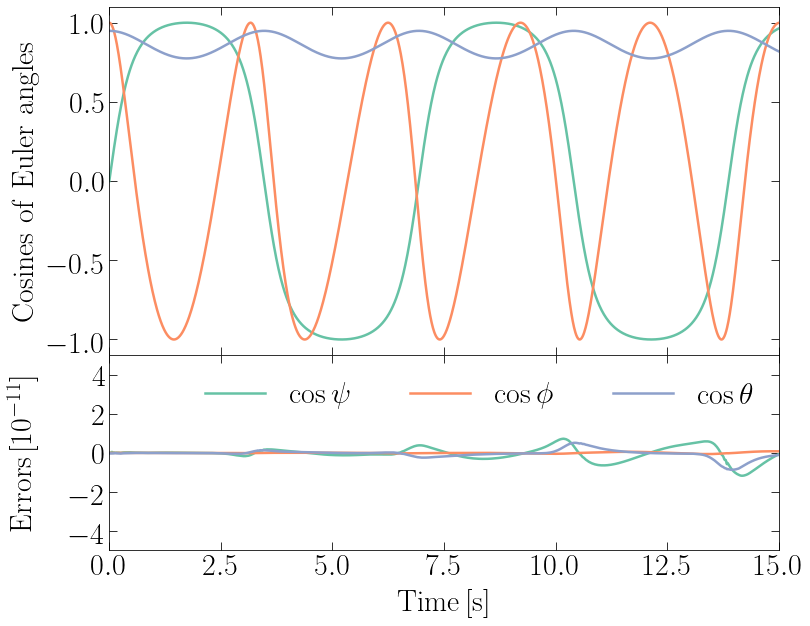

In [4]:
# Revover the cosines of three euler angle from quaternions
cos_theta=sol[:,3]**2 -sol[:,4]**2 -sol[:,5]**2 +sol[:,6]**2 
sin_theta=np.sin(np.arccos(cos_theta))
cos_phi=-2*(sol[:,5]*sol[:,6]-sol[:,3]*sol[:,4])/sin_theta
cos_psi=2*(sol[:,5]*sol[:,6]+sol[:,3]*sol[:,4])/sin_theta

import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter
fig, (ax1, ax2) = plt.subplots(2, gridspec_kw={ 'height_ratios': [2.5, 1.4]}, sharex=True,  sharey=False, figsize=(12,10))
plt.subplots_adjust(hspace=0.0)

cos_theta=sol[:,3]**2 -sol[:,4]**2 -sol[:,5]**2 +sol[:,6]**2 
sin_theta=np.sin(np.arccos(cos_theta))
cos_phi=-2*(sol[:,5]*sol[:,6]-sol[:,3]*sol[:,4])/sin_theta
cos_psi=2*(sol[:,5]*sol[:,6]+sol[:,3]*sol[:,4])/sin_theta


ax1.plot(t,cos_psi, linewidth=2.5, color='#66c2a5')
ax1.plot(t,cos_phi, linewidth=2.5,color='#fc8d62')
ax1.plot(t,cos_theta, linewidth=2.5,color='#8da0cb')
ax1.set_xlim(0,7)
ax1.set_ylabel(r'$\rm{Cosines \,\,of\,\, Euler \,\,angles}$',fontsize=30)


# import the data from analytica solution

data = np.genfromtxt('data/analytical_solution.dat')

tt=data[:,0]
cphi=data[:,1]
ctheta=data[:,2]
cpsi=data[:,3]


# plot the absolute errors

ax2.plot(tt,(cphi-cos_phi)/1e-11,linewidth=2.5, color='#66c2a5',label=r'$\cos \psi$')
ax2.plot(tt,(ctheta-cos_theta)/1e-11,linewidth=2.5, color='#fc8d62',label=r'$\cos \phi$')
ax2.plot(tt,(cpsi-cos_psi)/1e-11,linewidth=2.5, color='#8da0cb' ,label=r'$\cos \theta$')
ax2.set_xlabel(r'$\rm{Time\,[s]}$',fontsize=30)
ax2.set_ylabel(r'$\rm{Errors\,[10^{-11}]}$',fontsize=30)
ax2.set_xlim(0,15)
ax2.set_yticks([-4, -2,0,2,4])
ax2.set_ylim(-5,5)
ax2.tick_params(labelsize=30)
ax2.legend(fontsize=30,frameon=False, ncol=3)
ax1.tick_params(labelsize=30)
fig.align_labels()
plt.savefig("image/dynamics_example.pdf", format='pdf', bbox_inches="tight")